In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm
from Coeffs import *
import itertools
pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']

In [2]:
#Discovering the value of g1 and vev from UFO parameters

aEWM1 = 127.9
aEW = 1/aEWM1
ee = 2*np.sqrt(aEW)*np.sqrt(np.pi)
Gf = 0.0000116637
MZ = 91.1876
MW = np.sqrt(MZ**2/2. + np.sqrt(MZ**4/4. - (aEW*np.pi*MZ**2)/(Gf*np.sqrt(2))))
sw2 = 1- MW**2/MZ**2
sw = np.sqrt(sw2)
cw = np.sqrt(1-sw2)
g1 = ee/cw
vev = (2*MW*sw)/ee
print('g1 =', g1)
print('vev =', vev)

g1 = 0.35807170271074895
vev = 246.2205690734859


In [3]:
#Defining essential parameters:

gs = np.sqrt(1.63362817)
g1 = 0.35807170271074895
yDM = 3.0
lamHs = 1.0
ymt = 172.0 #GeV
vev = 246.2205690734859 #GeV
mPsiT = 100000.#GeV
mSDM = 90000. #GeV



In [4]:
mSDMv = np.linspace(200.,2500.,1000)
mPsiTv = np.linspace(200.,2500.,1000)

## $C_{dd}$

In [5]:
pts_dd = []
for mmsdm,mmpsit in itertools.product(mSDMv,mPsiTv):
    pts_dd.append([mmsdm,mmpsit,cdd(mmpsit, mmsdm, yDM, gs, g1)])
pts_dd = np.array(pts_dd)
print(pts_dd)

[[ 2.00000000e+02  2.00000000e+02 -9.44029731e-09]
 [ 2.00000000e+02  2.02302302e+02 -9.22664929e-09]
 [ 2.00000000e+02  2.04604605e+02 -9.02017279e-09]
 ...
 [ 2.50000000e+03  2.49539540e+03 -6.06410796e-11]
 [ 2.50000000e+03  2.49769770e+03 -6.05293369e-11]
 [ 2.50000000e+03  2.50000000e+03 -6.04179028e-11]]


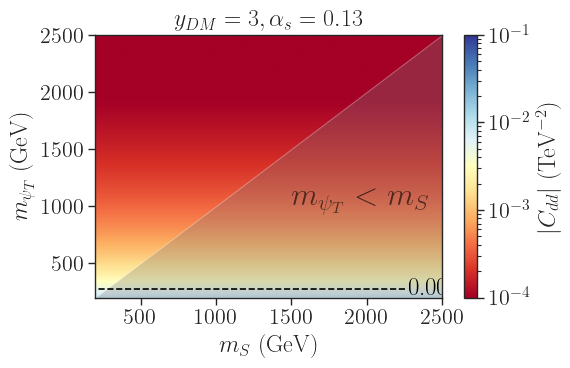

In [6]:

plt.figure(figsize=(6,4))
x = mSDMv
y = mPsiTv
z = (-pts_dd[:,2])*1e6 # Convert to TeV
znew = np.reshape(z,(len(x),len(y)))
plt.imshow(znew.T, extent=[x.min(),x.max(), y.min(), y.max()], origin='lower',
                  cmap=cm,aspect='auto',norm=LogNorm(vmin=1e-4,vmax=1e-1))
plt.colorbar(label=r'$|C_{dd}|$ (TeV$^{-2}$)')
plt.xlabel(r'$m_{S}$ (GeV)')
plt.ylabel(r'$m_{\psi_T}$ (GeV)')
# plt.title(r'$ g g \to \bar{t} t$',fontsize=20)

contours = plt.contour(x, y, znew.T, sorted([1e-2,5e-3]), colors='black',linestyles='dashed')
# plt.axline((500.,500.),slope=1.0,color='gray',linestyle='dashed',linewidth=2.0)
plt.fill_between(x, x, y.min(), facecolor='gray', alpha=0.3)
plt.text(1500.,1000.,r'$m_{\psi_T} < m_{S}$',fontsize=23,c='black',alpha=0.6)
plt.clabel(contours, inline=True, fontsize=18,fmt='%1.0g')
plt.xlim(200,2500)
plt.title(r'$y_{DM} = %1.0f, \alpha_s = %1.2f$' %(yDM,gs**2/(4*np.pi)))
plt.tight_layout()
plt.show()

## $C_{ed}$ 

In [7]:
pts_ed = []
for mmsdm,mmpsit in itertools.product(mSDMv,mPsiTv):
    pts_ed.append([mmsdm,mmpsit,ced(mmpsit, mmsdm, yDM, gs, g1)])
pts_ed = np.array(pts_ed)
print(pts_ed)

[[ 2.00000000e+02  2.00000000e+02 -3.08451226e-10]
 [ 2.00000000e+02  2.02302302e+02 -3.01470514e-10]
 [ 2.00000000e+02  2.04604605e+02 -2.94724124e-10]
 ...
 [ 2.50000000e+03  2.49539540e+03 -1.98137990e-12]
 [ 2.50000000e+03  2.49769770e+03 -1.97772883e-12]
 [ 2.50000000e+03  2.50000000e+03 -1.97408785e-12]]


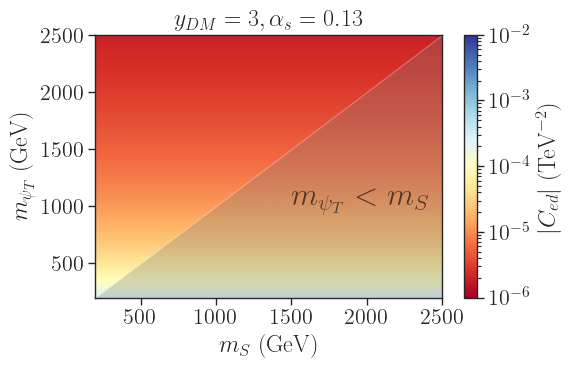

In [8]:

plt.figure(figsize=(6,4))
x = mSDMv
y = mPsiTv
z = (-pts_ed[:,2])*1e6 # Convert to TeV
znew = np.reshape(z,(len(x),len(y)))
plt.imshow(znew.T, extent=[x.min(),x.max(), y.min(), y.max()], origin='lower',
                  cmap=cm,aspect='auto',norm=LogNorm(vmin=1e-6,vmax=1e-2))
plt.colorbar(label=r'$|C_{ed}|$ (TeV$^{-2}$)')
plt.xlabel(r'$m_{S}$ (GeV)')
plt.ylabel(r'$m_{\psi_T}$ (GeV)')
# plt.title(r'$ g g \to \bar{t} t$',fontsize=20)

contours = plt.contour(x, y, znew.T, sorted([1e-2,5e-3]), colors='black',linestyles='dashed')
# plt.axline((500.,500.),slope=1.0,color='gray',linestyle='dashed',linewidth=2.0)
plt.fill_between(x, x, y.min(), facecolor='gray', alpha=0.3)
plt.text(1500.,1000.,r'$m_{\psi_T} < m_{S}$',fontsize=23,c='black',alpha=0.6)
plt.clabel(contours, inline=True, fontsize=18,fmt='%1.0g')
plt.xlim(200,2500)
plt.title(r'$y_{DM} = %1.0f, \alpha_s = %1.2f$' %(yDM,gs**2/(4*np.pi)))
plt.tight_layout()
plt.show()

## $C_{ee}$

In [9]:
pts_ee = []
for mmsdm,mmpsit in itertools.product(mSDMv,mPsiTv):
    pts_ee.append([mmsdm,mmpsit,cee(mmpsit, mmsdm, yDM, gs, g1)])
pts_ee = np.array(pts_ee)
print(pts_ee)

[[ 2.00000000e+02  2.00000000e+02 -2.31338419e-10]
 [ 2.00000000e+02  2.02302302e+02 -2.26102885e-10]
 [ 2.00000000e+02  2.04604605e+02 -2.21043093e-10]
 ...
 [ 2.50000000e+03  2.49539540e+03 -1.48603493e-12]
 [ 2.50000000e+03  2.49769770e+03 -1.48329662e-12]
 [ 2.50000000e+03  2.50000000e+03 -1.48056588e-12]]


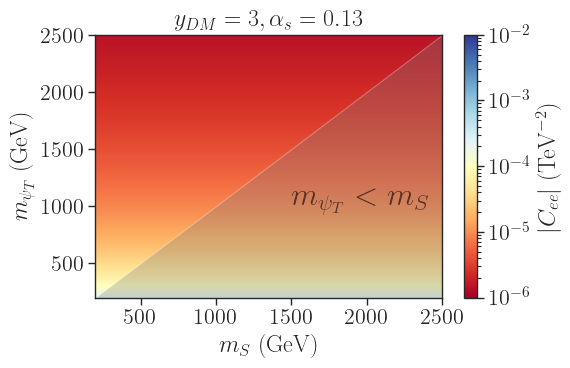

In [10]:

plt.figure(figsize=(6,4))
x = mSDMv
y = mPsiTv
z = (-pts_ee[:,2])*1e6 # Convert to TeV
znew = np.reshape(z,(len(x),len(y)))
plt.imshow(znew.T, extent=[x.min(),x.max(), y.min(), y.max()], origin='lower',
                  cmap=cm,aspect='auto',norm=LogNorm(vmin=1e-6,vmax=1e-2))
plt.colorbar(label=r'$|C_{ee}|$ (TeV$^{-2}$)')
plt.xlabel(r'$m_{S}$ (GeV)')
plt.ylabel(r'$m_{\psi_T}$ (GeV)')
# plt.title(r'$ g g \to \bar{t} t$',fontsize=20)

contours = plt.contour(x, y, znew.T, sorted([1e-2,5e-3]), colors='black',linestyles='dashed')
# plt.axline((500.,500.),slope=1.0,color='gray',linestyle='dashed',linewidth=2.0)
plt.fill_between(x, x, y.min(), facecolor='gray', alpha=0.3)
plt.text(1500.,1000.,r'$m_{\psi_T} < m_{S}$',fontsize=23,c='black',alpha=0.6)
plt.clabel(contours, inline=True, fontsize=18,fmt='%1.0g')
plt.xlim(200,2500)
plt.title(r'$y_{DM} = %1.0f, \alpha_s = %1.2f$' %(yDM,gs**2/(4*np.pi)))
plt.tight_layout()
plt.show()

## $C_{eu}$ with u=t specifically

In [11]:
pts_eu = []
for mmsdm,mmpsit in itertools.product(mSDMv,mPsiTv):
    pts_eu.append([mmsdm,mmpsit,ceu(mmpsit, mmsdm, yDM, gs, g1,t_op = True)])
pts_eu = np.array(pts_eu)
print(pts_eu)

[[ 2.00000000e+02  2.00000000e+02 -1.46068442e-08]
 [ 2.00000000e+02  2.02302302e+02 -1.43669577e-08]
 [ 2.00000000e+02  2.04604605e+02 -1.41329685e-08]
 ...
 [ 2.50000000e+03  2.49539540e+03 -9.37329397e-11]
 [ 2.50000000e+03  2.49769770e+03 -9.36082509e-11]
 [ 2.50000000e+03  2.50000000e+03 -9.34838026e-11]]


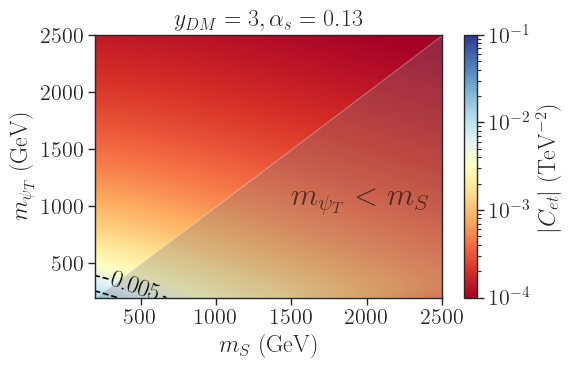

In [12]:

plt.figure(figsize=(6,4))
x = mSDMv
y = mPsiTv
z = (-pts_eu[:,2])*1e6 # Convert to TeV
znew = np.reshape(z,(len(x),len(y)))
plt.imshow(znew.T, extent=[x.min(),x.max(), y.min(), y.max()], origin='lower',
                  cmap=cm,aspect='auto',norm=LogNorm(vmin=1e-4,vmax=1e-1))
plt.colorbar(label=r'$|C_{et}|$ (TeV$^{-2}$)')
plt.xlabel(r'$m_{S}$ (GeV)')
plt.ylabel(r'$m_{\psi_T}$ (GeV)')
# plt.title(r'$ g g \to \bar{t} t$',fontsize=20)

contours = plt.contour(x, y, znew.T, sorted([1e-2,5e-3]), colors='black',linestyles='dashed')
# plt.axline((500.,500.),slope=1.0,color='gray',linestyle='dashed',linewidth=2.0)
plt.fill_between(x, x, y.min(), facecolor='gray', alpha=0.3)
plt.text(1500.,1000.,r'$m_{\psi_T} < m_{S}$',fontsize=23,c='black',alpha=0.6)
plt.clabel(contours, inline=True, fontsize=18,fmt='%1.0g')
plt.xlim(200,2500)
plt.title(r'$y_{DM} = %1.0f, \alpha_s = %1.2f$' %(yDM,gs**2/(4*np.pi)))
plt.tight_layout()
plt.show()

## $C_{G}$

In [13]:
pts_G = []
for mmsdm,mmpsit in itertools.product(mSDMv,mPsiTv):
    pts_G.append([mmsdm,mmpsit,cG(mmpsit, mmsdm, yDM, gs, g1)])
pts_G = np.array(pts_G)
print(pts_G)

[[ 2.00000000e+02  2.00000000e+02 -1.83644360e-09]
 [ 2.00000000e+02  2.02302302e+02 -1.79488214e-09]
 [ 2.00000000e+02  2.04604605e+02 -1.75471578e-09]
 ...
 [ 2.50000000e+03  2.49539540e+03 -1.17966542e-11]
 [ 2.50000000e+03  2.49769770e+03 -1.17749166e-11]
 [ 2.50000000e+03  2.50000000e+03 -1.17532391e-11]]


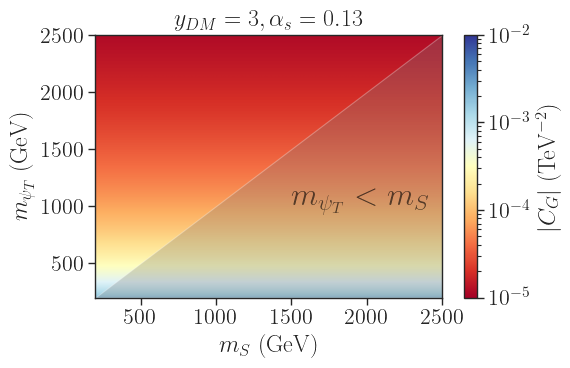

In [14]:
plt.figure(figsize=(6,4))
x = mSDMv
y = mPsiTv
z = (-pts_G[:,2])*1e6 # Convert to TeV
znew = np.reshape(z,(len(x),len(y)))
plt.imshow(znew.T, extent=[x.min(),x.max(), y.min(), y.max()], origin='lower',
                  cmap=cm,aspect='auto',norm=LogNorm(vmin=1e-5,vmax=1e-2))
plt.colorbar(label=r'$|C_{G}|$ (TeV$^{-2}$)')
plt.xlabel(r'$m_{S}$ (GeV)')
plt.ylabel(r'$m_{\psi_T}$ (GeV)')
# plt.title(r'$ g g \to \bar{t} t$',fontsize=20)

contours = plt.contour(x, y, znew.T, sorted([1e-2,5e-3]), colors='black',linestyles='dashed')
# plt.axline((500.,500.),slope=1.0,color='gray',linestyle='dashed',linewidth=2.0)
plt.fill_between(x, x, y.min(), facecolor='gray', alpha=0.3)
plt.text(1500.,1000.,r'$m_{\psi_T} < m_{S}$',fontsize=23,c='black',alpha=0.6)
plt.clabel(contours, inline=True, fontsize=18,fmt='%1.0g')
plt.xlim(200,2500)
plt.title(r'$y_{DM} = %1.0f, \alpha_s = %1.2f$' %(yDM,gs**2/(4*np.pi)))
plt.tight_layout()
plt.show()

## $C_H$ 

In [15]:
pts_H = []
for mmsdm,mmpsit in itertools.product(mSDMv,mPsiTv):
    pts_H.append([mmsdm,mmpsit,cH(mmpsit, mmsdm, yDM, gs, g1)])
pts_H = np.array(pts_H)
print(pts_H)

[[ 2.00000000e+02  2.00000000e+02 -4.45259108e-08]
 [ 2.00000000e+02  2.02302302e+02 -4.45259108e-08]
 [ 2.00000000e+02  2.04604605e+02 -4.45259108e-08]
 ...
 [ 2.50000000e+03  2.49539540e+03 -2.84965829e-10]
 [ 2.50000000e+03  2.49769770e+03 -2.84965829e-10]
 [ 2.50000000e+03  2.50000000e+03 -2.84965829e-10]]


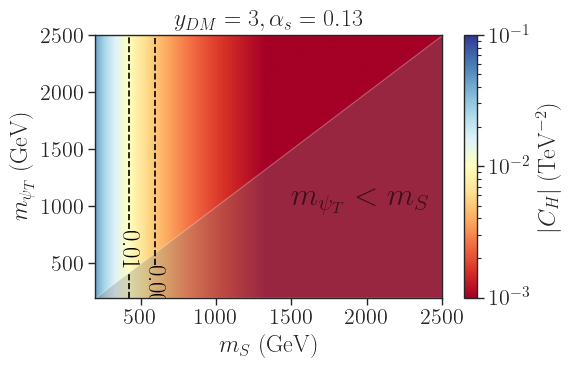

In [16]:
plt.figure(figsize=(6,4))
x = mSDMv
y = mPsiTv
z = (-pts_H[:,2])*1e6 # Convert to TeV
znew = np.reshape(z,(len(x),len(y)))
plt.imshow(znew.T, extent=[x.min(),x.max(), y.min(), y.max()], origin='lower',
                  cmap=cm,aspect='auto',norm=LogNorm(vmin=1e-3,vmax=1e-1))
plt.colorbar(label=r'$|C_{H}|$ (TeV$^{-2}$)')
plt.xlabel(r'$m_{S}$ (GeV)')
plt.ylabel(r'$m_{\psi_T}$ (GeV)')
# plt.title(r'$ g g \to \bar{t} t$',fontsize=20)

contours = plt.contour(x, y, znew.T, sorted([1e-2,5e-3]), colors='black',linestyles='dashed')
# plt.axline((500.,500.),slope=1.0,color='gray',linestyle='dashed',linewidth=2.0)
plt.fill_between(x, x, y.min(), facecolor='gray', alpha=0.3)
plt.text(1500.,1000.,r'$m_{\psi_T} < m_{S}$',fontsize=23,c='black',alpha=0.6)
plt.clabel(contours, inline=True, fontsize=18,fmt='%1.0g')
plt.xlim(200,2500)
plt.title(r'$y_{DM} = %1.0f, \alpha_s = %1.2f$' %(yDM,gs**2/(4*np.pi)))
plt.tight_layout()
plt.show()

## $C_{H\square}$

In [17]:
pts_HBox = []
for mmsdm,mmpsit in itertools.product(mSDMv,mPsiTv):
    pts_HBox.append([mmsdm,mmpsit,cHBox(mmpsit, mmsdm, lamHs, gs, g1)])
pts_HBox = np.array(pts_HBox)
print(pts_HBox)

[[ 2.00000000e+02  2.00000000e+02 -1.76477702e-09]
 [ 2.00000000e+02  2.02302302e+02 -1.76215925e-09]
 [ 2.00000000e+02  2.04604605e+02 -1.75962935e-09]
 ...
 [ 2.50000000e+03  2.49539540e+03 -1.12973074e-11]
 [ 2.50000000e+03  2.49769770e+03 -1.12959383e-11]
 [ 2.50000000e+03  2.50000000e+03 -1.12945729e-11]]


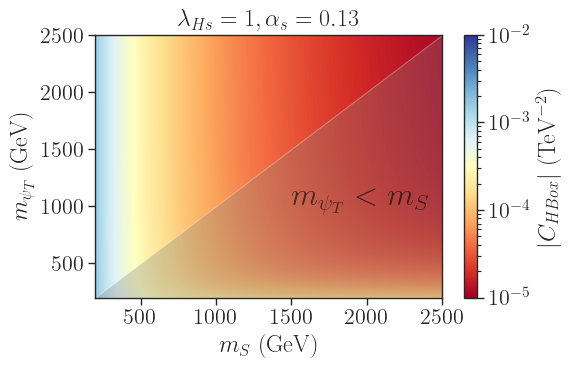

In [18]:
plt.figure(figsize=(6,4))
x = mSDMv
y = mPsiTv
z = (-pts_HBox[:,2])*1e6 # Convert to TeV
znew = np.reshape(z,(len(x),len(y)))
plt.imshow(znew.T, extent=[x.min(),x.max(), y.min(), y.max()], origin='lower',
                  cmap=cm,aspect='auto',norm=LogNorm(vmin=1e-5,vmax=1e-2))
plt.colorbar(label=r'$|C_{HBox}|$ (TeV$^{-2}$)')
plt.xlabel(r'$m_{S}$ (GeV)')
plt.ylabel(r'$m_{\psi_T}$ (GeV)')
# plt.title(r'$ g g \to \bar{t} t$',fontsize=20)

contours = plt.contour(x, y, znew.T, sorted([1e-2,5e-3]), colors='black',linestyles='dashed')
# plt.axline((500.,500.),slope=1.0,color='gray',linestyle='dashed',linewidth=2.0)
plt.fill_between(x, x, y.min(), facecolor='gray', alpha=0.3)
plt.text(1500.,1000.,r'$m_{\psi_T} < m_{S}$',fontsize=23,c='black',alpha=0.6)
plt.clabel(contours, inline=True, fontsize=18,fmt='%1.0g')
plt.xlim(200,2500)
plt.title(r'$\lambda_{Hs} = %1.0f, \alpha_s = %1.2f$' %(lamHs,gs**2/(4*np.pi)))
plt.tight_layout()
plt.show()

## $C_{Hd}$

In [19]:
pts_Hd = []
for mmsdm,mmpsit in itertools.product(mSDMv,mPsiTv):
    pts_Hd.append([mmsdm,mmpsit,cHd(mmpsit, mmsdm, yDM, gs, g1)])
pts_Hd = np.array(pts_Hd)
print(pts_Hd)

[[2.00000000e+02 2.00000000e+02 1.54225613e-10]
 [2.00000000e+02 2.02302302e+02 1.50735257e-10]
 [2.00000000e+02 2.04604605e+02 1.47362062e-10]
 ...
 [2.50000000e+03 2.49539540e+03 9.90689950e-13]
 [2.50000000e+03 2.49769770e+03 9.88864416e-13]
 [2.50000000e+03 2.50000000e+03 9.87043923e-13]]


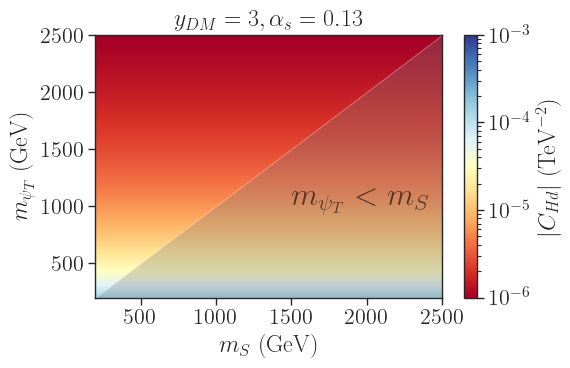

In [20]:
plt.figure(figsize=(6,4))
x = mSDMv
y = mPsiTv
z = (pts_Hd[:,2])*1e6 # Convert to TeV
znew = np.reshape(z,(len(x),len(y)))
plt.imshow(znew.T, extent=[x.min(),x.max(), y.min(), y.max()], origin='lower',
                  cmap=cm,aspect='auto',norm=LogNorm(vmin=1e-6,vmax=1e-3))
plt.colorbar(label=r'$|C_{Hd}|$ (TeV$^{-2}$)')
plt.xlabel(r'$m_{S}$ (GeV)')
plt.ylabel(r'$m_{\psi_T}$ (GeV)')
# plt.title(r'$ g g \to \bar{t} t$',fontsize=20)

contours = plt.contour(x, y, znew.T, sorted([1e-2,5e-3]), colors='black',linestyles='dashed')
# plt.axline((500.,500.),slope=1.0,color='gray',linestyle='dashed',linewidth=2.0)
plt.fill_between(x, x, y.min(), facecolor='gray', alpha=0.3)
plt.text(1500.,1000.,r'$m_{\psi_T} < m_{S}$',fontsize=23,c='black',alpha=0.6)
plt.clabel(contours, inline=True, fontsize=18,fmt='%1.0g')
plt.xlim(200,2500)
plt.title(r'$y_{DM} = %1.0f, \alpha_s = %1.2f$' %(yDM,gs**2/(4*np.pi)))
plt.tight_layout()
plt.show()

## $C_{HD}$

In [21]:
pts_HD = []
for mmsdm,mmpsit in itertools.product(mSDMv,mPsiTv):
    pts_HD.append([mmsdm,mmpsit,cHD(mmpsit, mmsdm, yDM, gs, g1)])
pts_HD = np.array(pts_HD)
print(pts_HD)

[[ 2.00000000e+02  2.00000000e+02 -4.62676839e-10]
 [ 2.00000000e+02  2.02302302e+02 -4.52205771e-10]
 [ 2.00000000e+02  2.04604605e+02 -4.42086186e-10]
 ...
 [ 2.50000000e+03  2.49539540e+03 -2.97206985e-12]
 [ 2.50000000e+03  2.49769770e+03 -2.96659325e-12]
 [ 2.50000000e+03  2.50000000e+03 -2.96113177e-12]]


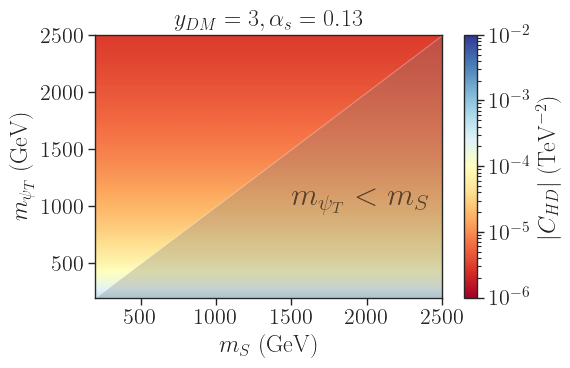

In [22]:
plt.figure(figsize=(6,4))
x = mSDMv
y = mPsiTv
z = (-pts_HD[:,2])*1e6 # Convert to TeV
znew = np.reshape(z,(len(x),len(y)))
plt.imshow(znew.T, extent=[x.min(),x.max(), y.min(), y.max()], origin='lower',
                  cmap=cm,aspect='auto',norm=LogNorm(vmin=1e-6,vmax=1e-2))
plt.colorbar(label=r'$|C_{HD}|$ (TeV$^{-2}$)')
plt.xlabel(r'$m_{S}$ (GeV)')
plt.ylabel(r'$m_{\psi_T}$ (GeV)')
# plt.title(r'$ g g \to \bar{t} t$',fontsize=20)

contours = plt.contour(x, y, znew.T, sorted([1e-2,5e-3]), colors='black',linestyles='dashed')
# plt.axline((500.,500.),slope=1.0,color='gray',linestyle='dashed',linewidth=2.0)
plt.fill_between(x, x, y.min(), facecolor='gray', alpha=0.3)
plt.text(1500.,1000.,r'$m_{\psi_T} < m_{S}$',fontsize=23,c='black',alpha=0.6)
plt.clabel(contours, inline=True, fontsize=18,fmt='%1.0g')
plt.xlim(200,2500)
plt.title(r'$y_{DM} = %1.0f, \alpha_s = %1.2f$' %(yDM,gs**2/(4*np.pi)))
plt.tight_layout()
plt.show()

## $C_{He}$

In [23]:
pts_He = []
for mmsdm,mmpsit in itertools.product(mSDMv,mPsiTv):
    pts_He.append([mmsdm,mmpsit,cHe(mmpsit, mmsdm, yDM, gs, g1)])
pts_He = np.array(pts_He)
print(pts_He)

[[2.00000000e+02 2.00000000e+02 4.62676839e-10]
 [2.00000000e+02 2.02302302e+02 4.52205771e-10]
 [2.00000000e+02 2.04604605e+02 4.42086186e-10]
 ...
 [2.50000000e+03 2.49539540e+03 2.97206985e-12]
 [2.50000000e+03 2.49769770e+03 2.96659325e-12]
 [2.50000000e+03 2.50000000e+03 2.96113177e-12]]


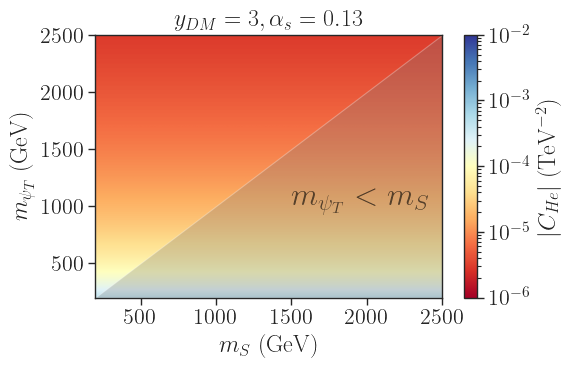

In [24]:
plt.figure(figsize=(6,4))
x = mSDMv
y = mPsiTv
z = (pts_He[:,2])*1e6 # Convert to TeV
znew = np.reshape(z,(len(x),len(y)))
plt.imshow(znew.T, extent=[x.min(),x.max(), y.min(), y.max()], origin='lower',
                  cmap=cm,aspect='auto',norm=LogNorm(vmin=1e-6,vmax=1e-2))
plt.colorbar(label=r'$|C_{He}|$ (TeV$^{-2}$)')
plt.xlabel(r'$m_{S}$ (GeV)')
plt.ylabel(r'$m_{\psi_T}$ (GeV)')
# plt.title(r'$ g g \to \bar{t} t$',fontsize=20)

contours = plt.contour(x, y, znew.T, sorted([1e-2,5e-3]), colors='black',linestyles='dashed')
# plt.axline((500.,500.),slope=1.0,color='gray',linestyle='dashed',linewidth=2.0)
plt.fill_between(x, x, y.min(), facecolor='gray', alpha=0.3)
plt.text(1500.,1000.,r'$m_{\psi_T} < m_{S}$',fontsize=23,c='black',alpha=0.6)
plt.clabel(contours, inline=True, fontsize=18,fmt='%1.0g')
plt.xlim(200,2500)
plt.title(r'$y_{DM} = %1.0f, \alpha_s = %1.2f$' %(yDM,gs**2/(4*np.pi)))
plt.tight_layout()
plt.show()

## $C_{Hl1}$

In [25]:
pts_Hl1 = []
for mmsdm,mmpsit in itertools.product(mSDMv,mPsiTv):
    pts_Hl1.append([mmsdm,mmpsit,cHl1(mmpsit, mmsdm, yDM, gs, g1)])
pts_Hl1 = np.array(pts_Hl1)
print(pts_Hl1)

[[2.00000000e+02 2.00000000e+02 2.31338419e-10]
 [2.00000000e+02 2.02302302e+02 2.26102885e-10]
 [2.00000000e+02 2.04604605e+02 2.21043093e-10]
 ...
 [2.50000000e+03 2.49539540e+03 1.48603493e-12]
 [2.50000000e+03 2.49769770e+03 1.48329662e-12]
 [2.50000000e+03 2.50000000e+03 1.48056588e-12]]


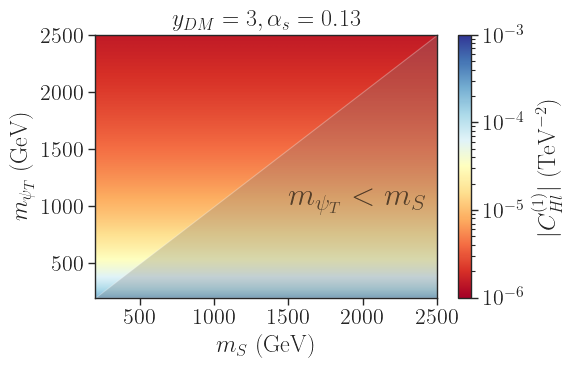

In [26]:
plt.figure(figsize=(6,4))
x = mSDMv
y = mPsiTv
z = (pts_Hl1[:,2])*1e6 # Convert to TeV
znew = np.reshape(z,(len(x),len(y)))
plt.imshow(znew.T, extent=[x.min(),x.max(), y.min(), y.max()], origin='lower',
                  cmap=cm,aspect='auto',norm=LogNorm(vmin=1e-6,vmax=1e-3))
plt.colorbar(label=r'$|C_{Hl}^{(1)}|$ (TeV$^{-2}$)')
plt.xlabel(r'$m_{S}$ (GeV)')
plt.ylabel(r'$m_{\psi_T}$ (GeV)')
# plt.title(r'$ g g \to \bar{t} t$',fontsize=20)

contours = plt.contour(x, y, znew.T, sorted([1e-2,5e-3]), colors='black',linestyles='dashed')
# plt.axline((500.,500.),slope=1.0,color='gray',linestyle='dashed',linewidth=2.0)
plt.fill_between(x, x, y.min(), facecolor='gray', alpha=0.3)
plt.text(1500.,1000.,r'$m_{\psi_T} < m_{S}$',fontsize=23,c='black',alpha=0.6)
plt.clabel(contours, inline=True, fontsize=18,fmt='%1.0g')
plt.xlim(200,2500)
plt.title(r'$y_{DM} = %1.0f, \alpha_s = %1.2f$' %(yDM,gs**2/(4*np.pi)))
plt.tight_layout()
plt.show()

## $C_{Hq}^{(1)}$ with q=t

In [27]:
pts_Hq1 = []
for mmsdm,mmpsit in itertools.product(mSDMv,mPsiTv):
    pts_Hq1.append([mmsdm,mmpsit,cHq1(mmpsit, mmsdm, yDM, gs, g1, vev, ymt, t_op = True)])
pts_Hq1 = np.array(pts_Hq1)
print(pts_Hq1)

[[2.00000000e+02 2.00000000e+02 2.88936400e-08]
 [2.00000000e+02 2.02302302e+02 2.86301231e-08]
 [2.00000000e+02 2.04604605e+02 2.83696188e-08]
 ...
 [2.50000000e+03 2.49539540e+03 1.85190926e-10]
 [2.50000000e+03 2.49769770e+03 1.85055049e-10]
 [2.50000000e+03 2.50000000e+03 1.84919296e-10]]


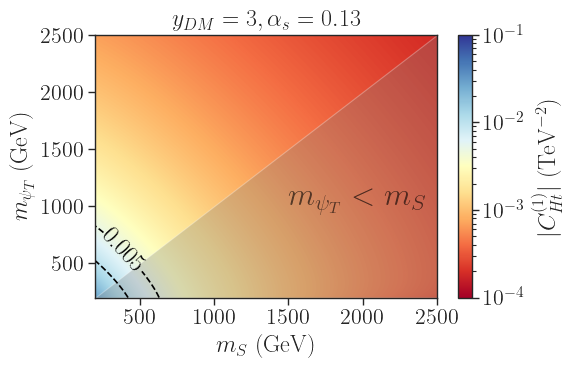

In [31]:
plt.figure(figsize=(6,4))
x = mSDMv
y = mPsiTv
z = (pts_Hq1[:,2])*1e6 # Convert to TeV
znew = np.reshape(z,(len(x),len(y)))
plt.imshow(znew.T, extent=[x.min(),x.max(), y.min(), y.max()], origin='lower',
                  cmap=cm,aspect='auto',norm=LogNorm(vmin=1e-4,vmax=1e-1))
plt.colorbar(label=r'$|C_{Ht}^{(1)}|$ (TeV$^{-2}$)')
plt.xlabel(r'$m_{S}$ (GeV)')
plt.ylabel(r'$m_{\psi_T}$ (GeV)')
# plt.title(r'$ g g \to \bar{t} t$',fontsize=20)

contours = plt.contour(x, y, znew.T, sorted([1e-2,5e-3]), colors='black',linestyles='dashed')
# plt.axline((500.,500.),slope=1.0,color='gray',linestyle='dashed',linewidth=2.0)
plt.fill_between(x, x, y.min(), facecolor='gray', alpha=0.3)
plt.text(1500.,1000.,r'$m_{\psi_T} < m_{S}$',fontsize=23,c='black',alpha=0.6)
plt.clabel(contours, inline=True, fontsize=18,fmt='%1.0g')
plt.xlim(200,2500)
plt.title(r'$y_{DM} = %1.0f, \alpha_s = %1.2f$' %(yDM,gs**2/(4*np.pi)))
plt.tight_layout()
plt.show()

## $C_{Hq}^{(3)}$ with q=t

In [29]:
pts_Hq3 = []
for mmsdm,mmpsit in itertools.product(mSDMv,mPsiTv):
    pts_Hq3.append([mmsdm,mmpsit,cHq3(mmpsit, mmsdm, yDM, gs, g1, vev, ymt, t_op = True)])
pts_Hq3 = np.array(pts_Hq3)
print(pts_Hq3)

[[ 2.00000000e+02  2.00000000e+02 -2.89707528e-08]
 [ 2.00000000e+02  2.02302302e+02 -2.87054907e-08]
 [ 2.00000000e+02  2.04604605e+02 -2.84432999e-08]
 ...
 [ 2.50000000e+03  2.49539540e+03 -1.85686271e-10]
 [ 2.50000000e+03  2.49769770e+03 -1.85549481e-10]
 [ 2.50000000e+03  2.50000000e+03 -1.85412818e-10]]


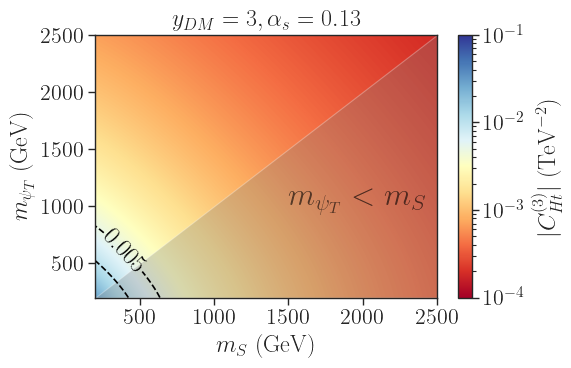

In [35]:
plt.figure(figsize=(6,4))
x = mSDMv
y = mPsiTv
z = (-pts_Hq3[:,2])*1e6 # Convert to TeV
znew = np.reshape(z,(len(x),len(y)))
plt.imshow(znew.T, extent=[x.min(),x.max(), y.min(), y.max()], origin='lower',
                  cmap=cm,aspect='auto',norm=LogNorm(vmin=1e-4,vmax=1e-1))
plt.colorbar(label=r'$|C_{Ht}^{(3)}|$ (TeV$^{-2}$)')
plt.xlabel(r'$m_{S}$ (GeV)')
plt.ylabel(r'$m_{\psi_T}$ (GeV)')
# plt.title(r'$ g g \to \bar{t} t$',fontsize=20)

contours = plt.contour(x, y, znew.T, sorted([1e-2,5e-3]), colors='black',linestyles='dashed')
# plt.axline((500.,500.),slope=1.0,color='gray',linestyle='dashed',linewidth=2.0)
plt.fill_between(x, x, y.min(), facecolor='gray', alpha=0.3)
plt.text(1500.,1000.,r'$m_{\psi_T} < m_{S}$',fontsize=23,c='black',alpha=0.6)
plt.clabel(contours, inline=True, fontsize=18,fmt='%1.0g')
plt.xlim(200,2500)
plt.title(r'$y_{DM} = %1.0f, \alpha_s = %1.2f$' %(yDM,gs**2/(4*np.pi)))
plt.tight_layout()
plt.show()

## $C_{Hu}$ with u=t

In [5]:
pts_Hu = []
for mmsdm,mmpsit in itertools.product(mSDMv,mPsiTv):
    pts_Hu.append([mmsdm,mmpsit,cHu(mmpsit, mmsdm, yDM, gs, g1, t_op = True)])
pts_Hu = np.array(pts_Hu)
print(pts_Hu)

[[2.00000000e+02 2.00000000e+02 7.30342208e-09]
 [2.00000000e+02 2.02302302e+02 7.18347883e-09]
 [2.00000000e+02 2.04604605e+02 7.06648423e-09]
 ...
 [2.50000000e+03 2.49539540e+03 4.68664698e-11]
 [2.50000000e+03 2.49769770e+03 4.68041254e-11]
 [2.50000000e+03 2.50000000e+03 4.67419013e-11]]


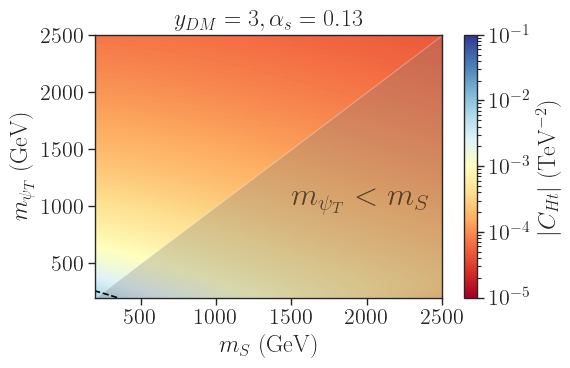

In [9]:
plt.figure(figsize=(6,4))
x = mSDMv
y = mPsiTv
z = (pts_Hu[:,2])*1e6 # Convert to TeV
znew = np.reshape(z,(len(x),len(y)))
plt.imshow(znew.T, extent=[x.min(),x.max(), y.min(), y.max()], origin='lower',
                  cmap=cm,aspect='auto',norm=LogNorm(vmin=1e-5,vmax=1e-1))
plt.colorbar(label=r'$|C_{Ht}|$ (TeV$^{-2}$)')
plt.xlabel(r'$m_{S}$ (GeV)')
plt.ylabel(r'$m_{\psi_T}$ (GeV)')
# plt.title(r'$ g g \to \bar{t} t$',fontsize=20)

contours = plt.contour(x, y, znew.T, sorted([1e-2,5e-3]), colors='black',linestyles='dashed')
# plt.axline((500.,500.),slope=1.0,color='gray',linestyle='dashed',linewidth=2.0)
plt.fill_between(x, x, y.min(), facecolor='gray', alpha=0.3)
plt.text(1500.,1000.,r'$m_{\psi_T} < m_{S}$',fontsize=23,c='black',alpha=0.6)
plt.clabel(contours, inline=True, fontsize=18,fmt='%1.0g')
plt.xlim(200,2500)
plt.title(r'$y_{DM} = %1.0f, \alpha_s = %1.2f$' %(yDM,gs**2/(4*np.pi)))
plt.tight_layout()
plt.show()

## $C_{ld}$

In [10]:
pts_ld = []
for mmsdm,mmpsit in itertools.product(mSDMv,mPsiTv):
    pts_ld.append([mmsdm,mmpsit,cld(mmpsit, mmsdm, yDM, gs, g1)])
pts_ld = np.array(pts_ld)
print(pts_ld)

[[ 2.00000000e+02  2.00000000e+02 -1.54225613e-10]
 [ 2.00000000e+02  2.02302302e+02 -1.50735257e-10]
 [ 2.00000000e+02  2.04604605e+02 -1.47362062e-10]
 ...
 [ 2.50000000e+03  2.49539540e+03 -9.90689950e-13]
 [ 2.50000000e+03  2.49769770e+03 -9.88864416e-13]
 [ 2.50000000e+03  2.50000000e+03 -9.87043923e-13]]


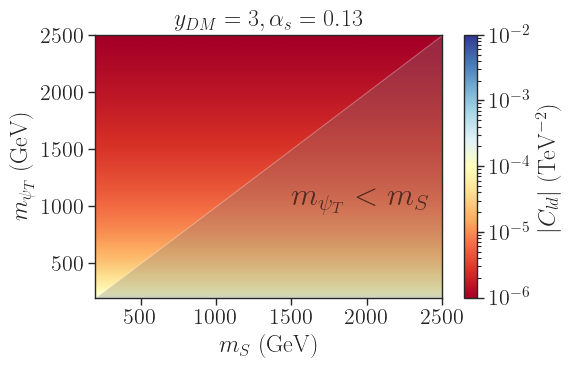

In [14]:
plt.figure(figsize=(6,4))
x = mSDMv
y = mPsiTv
z = (-pts_ld[:,2])*1e6 # Convert to TeV
znew = np.reshape(z,(len(x),len(y)))
plt.imshow(znew.T, extent=[x.min(),x.max(), y.min(), y.max()], origin='lower',
                  cmap=cm,aspect='auto',norm=LogNorm(vmin=1e-6,vmax=1e-2))
plt.colorbar(label=r'$|C_{ld}|$ (TeV$^{-2}$)')
plt.xlabel(r'$m_{S}$ (GeV)')
plt.ylabel(r'$m_{\psi_T}$ (GeV)')
# plt.title(r'$ g g \to \bar{t} t$',fontsize=20)

contours = plt.contour(x, y, znew.T, sorted([1e-2,5e-3]), colors='black',linestyles='dashed')
# plt.axline((500.,500.),slope=1.0,color='gray',linestyle='dashed',linewidth=2.0)
plt.fill_between(x, x, y.min(), facecolor='gray', alpha=0.3)
plt.text(1500.,1000.,r'$m_{\psi_T} < m_{S}$',fontsize=23,c='black',alpha=0.6)
plt.clabel(contours, inline=True, fontsize=18,fmt='%1.0g')
plt.xlim(200,2500)
plt.title(r'$y_{DM} = %1.0f, \alpha_s = %1.2f$' %(yDM,gs**2/(4*np.pi)))
plt.tight_layout()
plt.show()

## $C_{le}$

In [15]:
pts_le = []
for mmsdm,mmpsit in itertools.product(mSDMv,mPsiTv):
    pts_le.append([mmsdm,mmpsit,cle(mmpsit, mmsdm, yDM, gs, g1)])
pts_le = np.array(pts_le)
print(pts_le)

[[ 2.00000000e+02  2.00000000e+02 -4.62676839e-10]
 [ 2.00000000e+02  2.02302302e+02 -4.52205771e-10]
 [ 2.00000000e+02  2.04604605e+02 -4.42086186e-10]
 ...
 [ 2.50000000e+03  2.49539540e+03 -2.97206985e-12]
 [ 2.50000000e+03  2.49769770e+03 -2.96659325e-12]
 [ 2.50000000e+03  2.50000000e+03 -2.96113177e-12]]


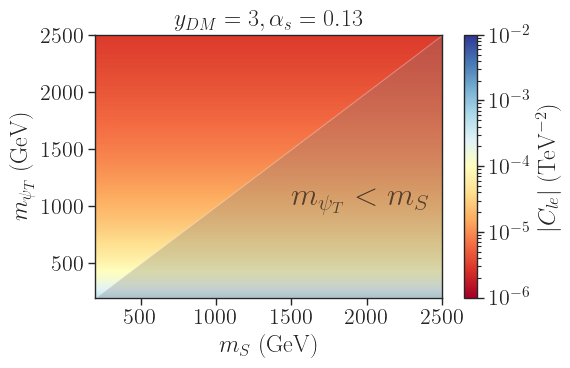

In [18]:
plt.figure(figsize=(6,4))
x = mSDMv
y = mPsiTv
z = (-pts_le[:,2])*1e6 # Convert to TeV
znew = np.reshape(z,(len(x),len(y)))
plt.imshow(znew.T, extent=[x.min(),x.max(), y.min(), y.max()], origin='lower',
                  cmap=cm,aspect='auto',norm=LogNorm(vmin=1e-6,vmax=1e-2))
plt.colorbar(label=r'$|C_{le}|$ (TeV$^{-2}$)')
plt.xlabel(r'$m_{S}$ (GeV)')
plt.ylabel(r'$m_{\psi_T}$ (GeV)')
# plt.title(r'$ g g \to \bar{t} t$',fontsize=20)

contours = plt.contour(x, y, znew.T, sorted([1e-2,5e-3]), colors='black',linestyles='dashed')
# plt.axline((500.,500.),slope=1.0,color='gray',linestyle='dashed',linewidth=2.0)
plt.fill_between(x, x, y.min(), facecolor='gray', alpha=0.3)
plt.text(1500.,1000.,r'$m_{\psi_T} < m_{S}$',fontsize=23,c='black',alpha=0.6)
plt.clabel(contours, inline=True, fontsize=18,fmt='%1.0g')
plt.xlim(200,2500)
plt.title(r'$y_{DM} = %1.0f, \alpha_s = %1.2f$' %(yDM,gs**2/(4*np.pi)))
plt.tight_layout()
plt.show()

## $C_{ll}$

In [19]:
pts_ll = []
for mmsdm,mmpsit in itertools.product(mSDMv,mPsiTv):
    pts_ll.append([mmsdm,mmpsit,cll(mmpsit, mmsdm, yDM, gs, g1)])
pts_ll = np.array(pts_ll)
print(pts_ll)

[[ 2.00000000e+02  2.00000000e+02 -1.15669210e-10]
 [ 2.00000000e+02  2.02302302e+02 -1.13051443e-10]
 [ 2.00000000e+02  2.04604605e+02 -1.10521546e-10]
 ...
 [ 2.50000000e+03  2.49539540e+03 -7.43017463e-13]
 [ 2.50000000e+03  2.49769770e+03 -7.41648312e-13]
 [ 2.50000000e+03  2.50000000e+03 -7.40282942e-13]]


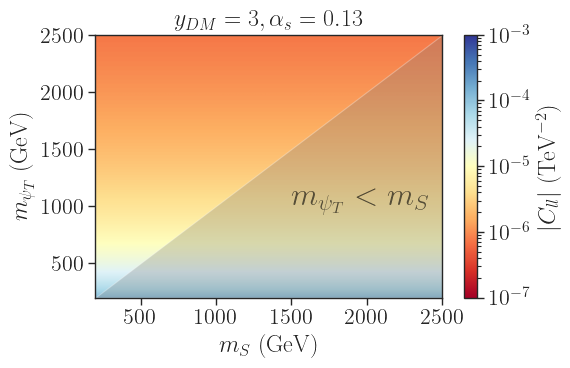

In [31]:
plt.figure(figsize=(6,4))
x = mSDMv
y = mPsiTv
z = (-pts_ll[:,2])*1e6 # Convert to TeV
znew = np.reshape(z,(len(x),len(y)))
plt.imshow(znew.T, extent=[x.min(),x.max(), y.min(), y.max()], origin='lower',
                  cmap=cm,aspect='auto',norm=LogNorm(vmin=1e-7,vmax=1e-3))
plt.colorbar(label=r'$|C_{ll}|$ (TeV$^{-2}$)')
plt.xlabel(r'$m_{S}$ (GeV)')
plt.ylabel(r'$m_{\psi_T}$ (GeV)')
# plt.title(r'$ g g \to \bar{t} t$',fontsize=20)

contours = plt.contour(x, y, znew.T, sorted([1e-2,5e-3]), colors='black',linestyles='dashed')
# plt.axline((500.,500.),slope=1.0,color='gray',linestyle='dashed',linewidth=2.0)
plt.fill_between(x, x, y.min(), facecolor='gray', alpha=0.3)
plt.text(1500.,1000.,r'$m_{\psi_T} < m_{S}$',fontsize=23,c='black',alpha=0.6)
plt.clabel(contours, inline=True, fontsize=18,fmt='%1.0g')
plt.xlim(200,2500)
plt.title(r'$y_{DM} = %1.0f, \alpha_s = %1.2f$' %(yDM,gs**2/(4*np.pi)))
plt.tight_layout()
plt.show()

## $C^{(1)}_{lq}$

In [27]:
pts_lq1 = []
for mmsdm,mmpsit in itertools.product(mSDMv,mPsiTv):
    pts_lq1.append([mmsdm,mmpsit,clq1(mmpsit, mmsdm, yDM, gs, g1)])
pts_lq1 = np.array(pts_lq1)
print(pts_lq1)

[[2.00000000e+02 2.00000000e+02 7.71128065e-11]
 [2.00000000e+02 2.02302302e+02 7.53676285e-11]
 [2.00000000e+02 2.04604605e+02 7.36810310e-11]
 ...
 [2.50000000e+03 2.49539540e+03 4.95344975e-13]
 [2.50000000e+03 2.49769770e+03 4.94432208e-13]
 [2.50000000e+03 2.50000000e+03 4.93521961e-13]]


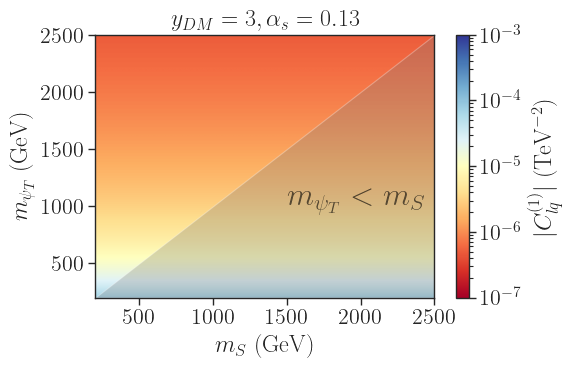

In [30]:
plt.figure(figsize=(6,4))
x = mSDMv
y = mPsiTv
z = (pts_lq1[:,2])*1e6 # Convert to TeV
znew = np.reshape(z,(len(x),len(y)))
plt.imshow(znew.T, extent=[x.min(),x.max(), y.min(), y.max()], origin='lower',
                  cmap=cm,aspect='auto',norm=LogNorm(vmin=1e-7,vmax=1e-3))
plt.colorbar(label=r'$|C_{lq}^{(1)}|$ (TeV$^{-2}$)')
plt.xlabel(r'$m_{S}$ (GeV)')
plt.ylabel(r'$m_{\psi_T}$ (GeV)')
# plt.title(r'$ g g \to \bar{t} t$',fontsize=20)

contours = plt.contour(x, y, znew.T, sorted([1e-2,5e-3]), colors='black',linestyles='dashed')
# plt.axline((500.,500.),slope=1.0,color='gray',linestyle='dashed',linewidth=2.0)
plt.fill_between(x, x, y.min(), facecolor='gray', alpha=0.3)
plt.text(1500.,1000.,r'$m_{\psi_T} < m_{S}$',fontsize=23,c='black',alpha=0.6)
plt.clabel(contours, inline=True, fontsize=18,fmt='%1.0g')
plt.xlim(200,2500)
plt.title(r'$y_{DM} = %1.0f, \alpha_s = %1.2f$' %(yDM,gs**2/(4*np.pi)))
plt.tight_layout()
plt.show()

## $C_{lu}$ with u=t

In [32]:
pts_lu = []
for mmsdm,mmpsit in itertools.product(mSDMv,mPsiTv):
    pts_lu.append([mmsdm,mmpsit,clu(mmpsit, mmsdm, yDM, gs, g1, t_op = True)])
pts_lu = np.array(pts_lu)
print(pts_lu)

[[ 2.00000000e+02  2.00000000e+02 -7.30342208e-09]
 [ 2.00000000e+02  2.02302302e+02 -7.18347883e-09]
 [ 2.00000000e+02  2.04604605e+02 -7.06648423e-09]
 ...
 [ 2.50000000e+03  2.49539540e+03 -4.68664698e-11]
 [ 2.50000000e+03  2.49769770e+03 -4.68041254e-11]
 [ 2.50000000e+03  2.50000000e+03 -4.67419013e-11]]


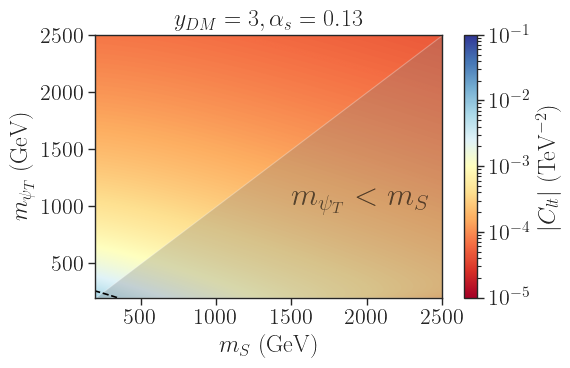

In [41]:
plt.figure(figsize=(6,4))
x = mSDMv
y = mPsiTv
z = (-pts_lu[:,2])*1e6 # Convert to TeV
znew = np.reshape(z,(len(x),len(y)))
plt.imshow(znew.T, extent=[x.min(),x.max(), y.min(), y.max()], origin='lower',
                  cmap=cm,aspect='auto',norm=LogNorm(vmin=1e-5,vmax=1e-1))
plt.colorbar(label=r'$|C_{lt}|$ (TeV$^{-2}$)')
plt.xlabel(r'$m_{S}$ (GeV)')
plt.ylabel(r'$m_{\psi_T}$ (GeV)')
# plt.title(r'$ g g \to \bar{t} t$',fontsize=20)

contours = plt.contour(x, y, znew.T, sorted([1e-2,5e-3]), colors='black',linestyles='dashed')
# plt.axline((500.,500.),slope=1.0,color='gray',linestyle='dashed',linewidth=2.0)
plt.fill_between(x, x, y.min(), facecolor='gray', alpha=0.3)
plt.text(1500.,1000.,r'$m_{\psi_T} < m_{S}$',fontsize=23,c='black',alpha=0.6)
plt.clabel(contours, inline=True, fontsize=18,fmt='%1.0g')
plt.xlim(200,2500)
plt.title(r'$y_{DM} = %1.0f, \alpha_s = %1.2f$' %(yDM,gs**2/(4*np.pi)))
plt.tight_layout()
plt.show()

## $C_{qd}^{(1)}$

In [42]:
pts_qd1 = []
for mmsdm,mmpsit in itertools.product(mSDMv,mPsiTv):
    pts_qd1.append([mmsdm,mmpsit,cqd1(mmpsit, mmsdm, yDM, gs, g1)])
pts_qd1 = np.array(pts_qd1)
print(pts_qd1)

[[2.00000000e+02 2.00000000e+02 5.14085376e-11]
 [2.00000000e+02 2.02302302e+02 5.02450856e-11]
 [2.00000000e+02 2.04604605e+02 4.91206873e-11]
 ...
 [2.50000000e+03 2.49539540e+03 3.30229983e-13]
 [2.50000000e+03 2.49769770e+03 3.29621472e-13]
 [2.50000000e+03 2.50000000e+03 3.29014641e-13]]


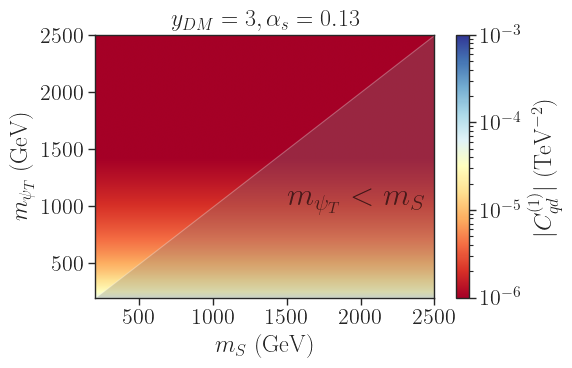

In [53]:
plt.figure(figsize=(6,4))
x = mSDMv
y = mPsiTv
z = (pts_qd1[:,2])*1e6 # Convert to TeV
znew = np.reshape(z,(len(x),len(y)))
plt.imshow(znew.T, extent=[x.min(),x.max(), y.min(), y.max()], origin='lower',
                  cmap=cm,aspect='auto',norm=LogNorm(vmin=1e-6,vmax=1e-3))
plt.colorbar(label=r'$|C_{qd}^{(1)}|$ (TeV$^{-2}$)')
plt.xlabel(r'$m_{S}$ (GeV)')
plt.ylabel(r'$m_{\psi_T}$ (GeV)')
# plt.title(r'$ g g \to \bar{t} t$',fontsize=20)

contours = plt.contour(x, y, znew.T, sorted([1e-2,5e-3]), colors='black',linestyles='dashed')
# plt.axline((500.,500.),slope=1.0,color='gray',linestyle='dashed',linewidth=2.0)
plt.fill_between(x, x, y.min(), facecolor='gray', alpha=0.3)
plt.text(1500.,1000.,r'$m_{\psi_T} < m_{S}$',fontsize=23,c='black',alpha=0.6)
plt.clabel(contours, inline=True, fontsize=18,fmt='%1.0g')
plt.xlim(200,2500)
plt.title(r'$y_{DM} = %1.0f, \alpha_s = %1.2f$' %(yDM,gs**2/(4*np.pi)))
plt.tight_layout()
plt.show()

## $C_{qd}^{(8)}$

In [46]:
pts_qd8 = []
for mmsdm,mmpsit in itertools.product(mSDMv,mPsiTv):
    pts_qd8.append([mmsdm,mmpsit,cqd8(mmpsit, mmsdm, yDM, gs, g1)])
pts_qd8 = np.array(pts_qd8)
print(pts_qd8)

[[2.00000000e+02 2.00000000e+02 5.63333327e-08]
 [2.00000000e+02 2.02302302e+02 5.50584252e-08]
 [2.00000000e+02 2.04604605e+02 5.38263126e-08]
 ...
 [2.50000000e+03 2.49539540e+03 3.61865098e-10]
 [2.50000000e+03 2.49769770e+03 3.61198293e-10]
 [2.50000000e+03 2.50000000e+03 3.60533329e-10]]


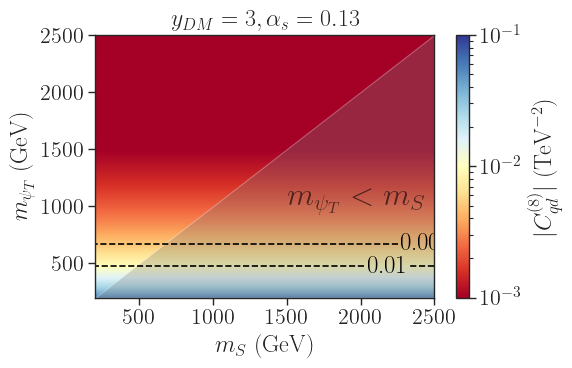

In [54]:
plt.figure(figsize=(6,4))
x = mSDMv
y = mPsiTv
z = (pts_qd8[:,2])*1e6 # Convert to TeV
znew = np.reshape(z,(len(x),len(y)))
plt.imshow(znew.T, extent=[x.min(),x.max(), y.min(), y.max()], origin='lower',
                  cmap=cm,aspect='auto',norm=LogNorm(vmin=1e-3,vmax=1e-1))
plt.colorbar(label=r'$|C_{qd}^{(8)}|$ (TeV$^{-2}$)')
plt.xlabel(r'$m_{S}$ (GeV)')
plt.ylabel(r'$m_{\psi_T}$ (GeV)')
# plt.title(r'$ g g \to \bar{t} t$',fontsize=20)

contours = plt.contour(x, y, znew.T, sorted([1e-2,5e-3]), colors='black',linestyles='dashed')
# plt.axline((500.,500.),slope=1.0,color='gray',linestyle='dashed',linewidth=2.0)
plt.fill_between(x, x, y.min(), facecolor='gray', alpha=0.3)
plt.text(1500.,1000.,r'$m_{\psi_T} < m_{S}$',fontsize=23,c='black',alpha=0.6)
plt.clabel(contours, inline=True, fontsize=18,fmt='%1.0g')
plt.xlim(200,2500)
plt.title(r'$y_{DM} = %1.0f, \alpha_s = %1.2f$' %(yDM,gs**2/(4*np.pi)))
plt.tight_layout()
plt.show()

## $C_{qe}$

In [55]:
pts_qe = []
for mmsdm,mmpsit in itertools.product(mSDMv,mPsiTv):
    pts_qe.append([mmsdm,mmpsit,cqe(mmpsit, mmsdm, yDM, gs, g1)])
pts_qe = np.array(pts_qe)
print(pts_qe)

[[2.00000000e+02 2.00000000e+02 1.54225613e-10]
 [2.00000000e+02 2.02302302e+02 1.50735257e-10]
 [2.00000000e+02 2.04604605e+02 1.47362062e-10]
 ...
 [2.50000000e+03 2.49539540e+03 9.90689950e-13]
 [2.50000000e+03 2.49769770e+03 9.88864416e-13]
 [2.50000000e+03 2.50000000e+03 9.87043923e-13]]


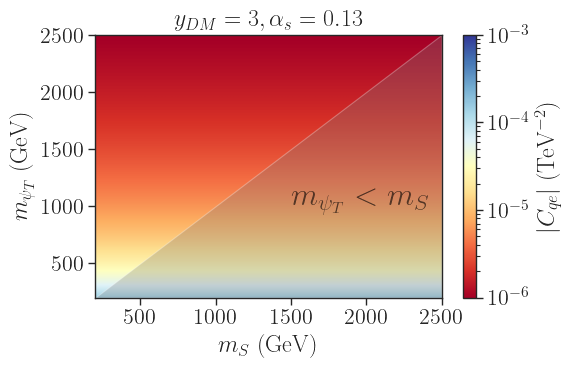

In [61]:
plt.figure(figsize=(6,4))
x = mSDMv
y = mPsiTv
z = (pts_qe[:,2])*1e6 # Convert to TeV
znew = np.reshape(z,(len(x),len(y)))
plt.imshow(znew.T, extent=[x.min(),x.max(), y.min(), y.max()], origin='lower',
                  cmap=cm,aspect='auto',norm=LogNorm(vmin=1e-6,vmax=1e-3))
plt.colorbar(label=r'$|C_{qe}|$ (TeV$^{-2}$)')
plt.xlabel(r'$m_{S}$ (GeV)')
plt.ylabel(r'$m_{\psi_T}$ (GeV)')
# plt.title(r'$ g g \to \bar{t} t$',fontsize=20)

contours = plt.contour(x, y, znew.T, sorted([1e-2,5e-3]), colors='black',linestyles='dashed')
# plt.axline((500.,500.),slope=1.0,color='gray',linestyle='dashed',linewidth=2.0)
plt.fill_between(x, x, y.min(), facecolor='gray', alpha=0.3)
plt.text(1500.,1000.,r'$m_{\psi_T} < m_{S}$',fontsize=23,c='black',alpha=0.6)
plt.clabel(contours, inline=True, fontsize=18,fmt='%1.0g')
plt.xlim(200,2500)
plt.title(r'$y_{DM} = %1.0f, \alpha_s = %1.2f$' %(yDM,gs**2/(4*np.pi)))
plt.tight_layout()
plt.show()

## $C_{qq}^{(1)}$

In [62]:
pts_qq1 = []
for mmsdm,mmpsit in itertools.product(mSDMv,mPsiTv):
    pts_qq1.append([mmsdm,mmpsit,cqq1(mmpsit, mmsdm, yDM, gs, g1)])
pts_qq1 = np.array(pts_qq1)
print(pts_qq1)

[[ 2.00000000e+02  2.00000000e+02 -2.36007433e-09]
 [ 2.00000000e+02  2.02302302e+02 -2.30666232e-09]
 [ 2.00000000e+02  2.04604605e+02 -2.25504320e-09]
 ...
 [ 2.50000000e+03  2.49539540e+03 -1.51602699e-11]
 [ 2.50000000e+03  2.49769770e+03 -1.51323342e-11]
 [ 2.50000000e+03  2.50000000e+03 -1.51044757e-11]]


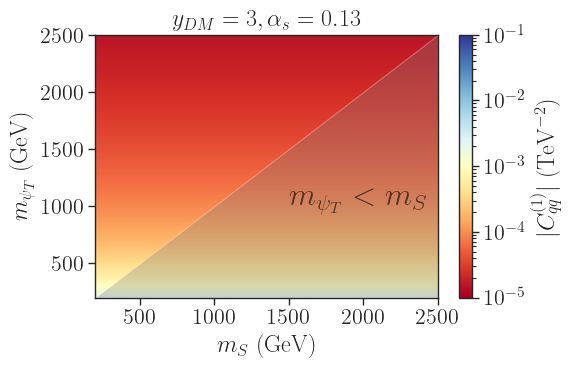

In [64]:
plt.figure(figsize=(6,4))
x = mSDMv
y = mPsiTv
z = (-pts_qq1[:,2])*1e6 # Convert to TeV
znew = np.reshape(z,(len(x),len(y)))
plt.imshow(znew.T, extent=[x.min(),x.max(), y.min(), y.max()], origin='lower',
                  cmap=cm,aspect='auto',norm=LogNorm(vmin=1e-5,vmax=1e-1))
plt.colorbar(label=r'$|C_{qq}^{(1)}|$ (TeV$^{-2}$)')
plt.xlabel(r'$m_{S}$ (GeV)')
plt.ylabel(r'$m_{\psi_T}$ (GeV)')
# plt.title(r'$ g g \to \bar{t} t$',fontsize=20)

contours = plt.contour(x, y, znew.T, sorted([1e-2,5e-3]), colors='black',linestyles='dashed')
# plt.axline((500.,500.),slope=1.0,color='gray',linestyle='dashed',linewidth=2.0)
plt.fill_between(x, x, y.min(), facecolor='gray', alpha=0.3)
plt.text(1500.,1000.,r'$m_{\psi_T} < m_{S}$',fontsize=23,c='black',alpha=0.6)
plt.clabel(contours, inline=True, fontsize=18,fmt='%1.0g')
plt.xlim(200,2500)
plt.title(r'$y_{DM} = %1.0f, \alpha_s = %1.2f$' %(yDM,gs**2/(4*np.pi)))
plt.tight_layout()
plt.show()

## $C_{qq}^{(3)}$

In [65]:
pts_qq3 = []
for mmsdm,mmpsit in itertools.product(mSDMv,mPsiTv):
    pts_qq3.append([mmsdm,mmpsit,cqq3(mmpsit, mmsdm, yDM, gs, g1)])
pts_qq3 = np.array(pts_qq3)
print(pts_qq3)

[[ 2.00000000e+02  2.00000000e+02 -7.04166658e-09]
 [ 2.00000000e+02  2.02302302e+02 -6.88230315e-09]
 [ 2.00000000e+02  2.04604605e+02 -6.72828908e-09]
 ...
 [ 2.50000000e+03  2.49539540e+03 -4.52331372e-11]
 [ 2.50000000e+03  2.49769770e+03 -4.51497866e-11]
 [ 2.50000000e+03  2.50000000e+03 -4.50666661e-11]]


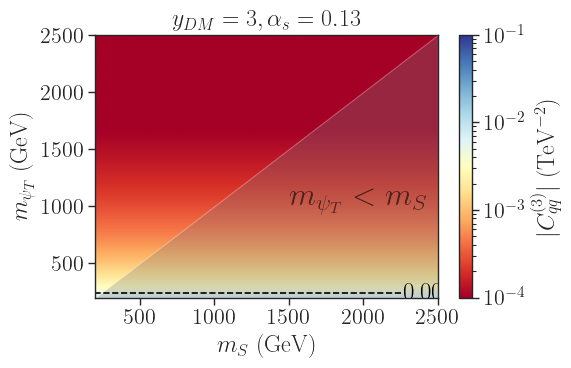

In [69]:
plt.figure(figsize=(6,4))
x = mSDMv
y = mPsiTv
z = (-pts_qq3[:,2])*1e6 # Convert to TeV
znew = np.reshape(z,(len(x),len(y)))
plt.imshow(znew.T, extent=[x.min(),x.max(), y.min(), y.max()], origin='lower',
                  cmap=cm,aspect='auto',norm=LogNorm(vmin=1e-4,vmax=1e-1))
plt.colorbar(label=r'$|C_{qq}^{(3)}|$ (TeV$^{-2}$)')
plt.xlabel(r'$m_{S}$ (GeV)')
plt.ylabel(r'$m_{\psi_T}$ (GeV)')
# plt.title(r'$ g g \to \bar{t} t$',fontsize=20)

contours = plt.contour(x, y, znew.T, sorted([1e-2,5e-3]), colors='black',linestyles='dashed')
# plt.axline((500.,500.),slope=1.0,color='gray',linestyle='dashed',linewidth=2.0)
plt.fill_between(x, x, y.min(), facecolor='gray', alpha=0.3)
plt.text(1500.,1000.,r'$m_{\psi_T} < m_{S}$',fontsize=23,c='black',alpha=0.6)
plt.clabel(contours, inline=True, fontsize=18,fmt='%1.0g')
plt.xlim(200,2500)
plt.title(r'$y_{DM} = %1.0f, \alpha_s = %1.2f$' %(yDM,gs**2/(4*np.pi)))
plt.tight_layout()
plt.show()

## $C_{qu}^{(1)}$ with u=t

In [74]:
pts_qu1 = []
for mmsdm,mmpsit in itertools.product(mSDMv,mPsiTv):
    pts_qu1.append([mmsdm,mmpsit,cqu1(mmpsit, mmsdm, yDM, gs, g1, t_op = True)])
pts_qu1 = np.array(pts_qu1)
print(pts_qu1)

[[2.00000000e+02 2.00000000e+02 2.43447403e-09]
 [2.00000000e+02 2.02302302e+02 2.39449294e-09]
 [2.00000000e+02 2.04604605e+02 2.35549474e-09]
 ...
 [2.50000000e+03 2.49539540e+03 1.56221566e-11]
 [2.50000000e+03 2.49769770e+03 1.56013751e-11]
 [2.50000000e+03 2.50000000e+03 1.55806338e-11]]


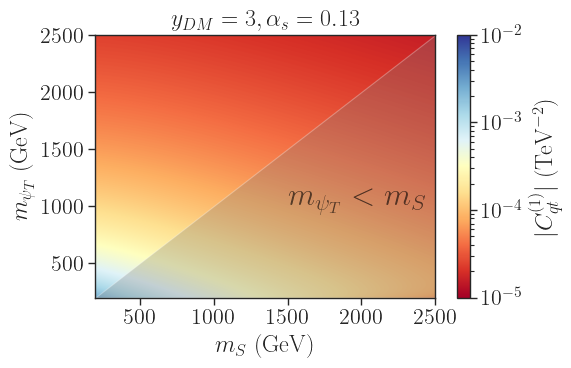

In [87]:
plt.figure(figsize=(6,4))
x = mSDMv
y = mPsiTv
z = (pts_qu1[:,2])*1e6 # Convert to TeV
znew = np.reshape(z,(len(x),len(y)))
plt.imshow(znew.T, extent=[x.min(),x.max(), y.min(), y.max()], origin='lower',
                  cmap=cm,aspect='auto',norm=LogNorm(vmin=1e-5,vmax=1e-2))
plt.colorbar(label=r'$|C_{qt}^{(1)}|$ (TeV$^{-2}$)')
plt.xlabel(r'$m_{S}$ (GeV)')
plt.ylabel(r'$m_{\psi_T}$ (GeV)')
# plt.title(r'$ g g \to \bar{t} t$',fontsize=20)

contours = plt.contour(x, y, znew.T, sorted([1e-2,5e-3]), colors='black',linestyles='dashed')
# plt.axline((500.,500.),slope=1.0,color='gray',linestyle='dashed',linewidth=2.0)
plt.fill_between(x, x, y.min(), facecolor='gray', alpha=0.3)
plt.text(1500.,1000.,r'$m_{\psi_T} < m_{S}$',fontsize=23,c='black',alpha=0.6)
plt.clabel(contours, inline=True, fontsize=18,fmt='%1.0g')
plt.xlim(200,2500)
plt.title(r'$y_{DM} = %1.0f, \alpha_s = %1.2f$' %(yDM,gs**2/(4*np.pi)))
plt.tight_layout()
plt.show()

## $C_{qu}^{(8)}$ with u=t

In [78]:
pts_qu8 = []
for mmsdm,mmpsit in itertools.product(mSDMv,mPsiTv):
    pts_qu8.append([mmsdm,mmpsit,cqu8(mmpsit, mmsdm, yDM, gs, g1, t_op = True)])
pts_qu8 = np.array(pts_qu8)
print(pts_qu8)

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
[[2.00000000e+02 2.00000000e+02 2.34621796e-07]
 [2.00000000e+02 2.02302302e+02 2.31045180e-07]
 [2.00000000e+02 2.04604605e+02 2.27547435e-07]
 ...
 [2.50000000e+03 2.49539540e+03 1.50528794e-09]
 [2.50000000e+03 2.49769770e+03 1.50343215e-09]
 [2.50000000e+03 2.50000000e+03 1.50157949e-09]]


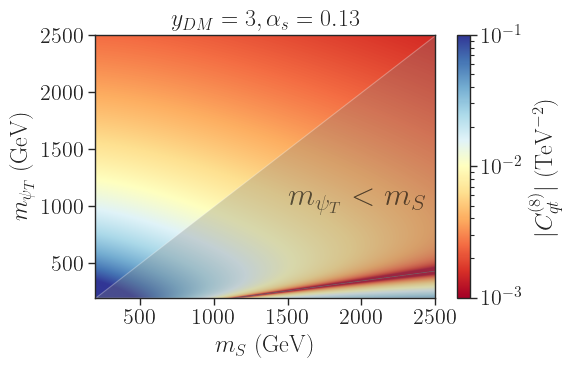

In [88]:
plt.figure(figsize=(6,4))
x = mSDMv
y = mPsiTv
#Positive values 
z_p = (pts_qu8[:,2])*1e6 # Convert to TeV
znewp = np.reshape(z_p,(len(x),len(y)))
plt.imshow(znewp.T, extent=[x.min(),x.max(), y.min(), y.max()], origin='lower',
                  cmap=cm,aspect='auto',norm=LogNorm(vmin=1e-3,vmax=1e-1))
#Negative values
z_m = (-pts_qu8[:,2])*1e6 # Convert to TeV
znewm = np.reshape(z_m,(len(x),len(y)))
plt.imshow(znewm.T, extent=[x.min(),x.max(), y.min(), y.max()], origin='lower',
                  cmap=cm,aspect='auto',norm=LogNorm(vmin=1e-3,vmax=1e-1))
plt.colorbar(label=r'$|C_{qt}^{(8)}|$ (TeV$^{-2}$)')
plt.xlabel(r'$m_{S}$ (GeV)')
plt.ylabel(r'$m_{\psi_T}$ (GeV)')
# plt.title(r'$ g g \to \bar{t} t$',fontsize=20)

contours = plt.contour(x, y, znew.T, sorted([1e-2,5e-3]), colors='black',linestyles='dashed')
# plt.axline((500.,500.),slope=1.0,color='gray',linestyle='dashed',linewidth=2.0)
plt.fill_between(x, x, y.min(), facecolor='gray', alpha=0.3)
plt.text(1500.,1000.,r'$m_{\psi_T} < m_{S}$',fontsize=23,c='black',alpha=0.6)
plt.clabel(contours, inline=True, fontsize=18,fmt='%1.0g')
plt.xlim(200,2500)
plt.title(r'$y_{DM} = %1.0f, \alpha_s = %1.2f$' %(yDM,gs**2/(4*np.pi)))
plt.tight_layout()
plt.show()

Interesting observation: The coefficient is postive for the majority of masses, except for $m_S \in [1000,2500]$ and approximately $m_{\Psi_T} \in [200,400]$. However we are not interested in this region because it corresponds to a stable colored vector-like top partner.

## $C_{uB}$ with u=t

In [5]:
pts_uB = []
for mmsdm,mmpsit in itertools.product(mSDMv,mPsiTv):
    pts_uB.append([mmsdm,mmpsit,cuB(mmpsit, mmsdm, yDM, gs, g1,ymt,vev)])
pts_uB = np.array(pts_uB)
print(pts_uB)

[[2.00000000e+02 2.00000000e+02 7.00034444e-09]
 [2.00000000e+02 2.02302302e+02 6.90457063e-09]
 [2.00000000e+02 2.04604605e+02 6.81065213e-09]
 ...
 [2.50000000e+03 2.49539540e+03 4.49013787e-11]
 [2.50000000e+03 2.49769770e+03 4.48517535e-11]
 [2.50000000e+03 2.50000000e+03 4.48022044e-11]]


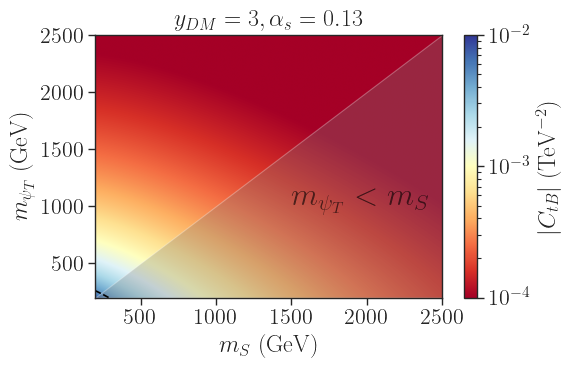

In [14]:
plt.figure(figsize=(6,4))
x = mSDMv
y = mPsiTv
z = (pts_uB[:,2])*1e6 # Convert to TeV
znew = np.reshape(z,(len(x),len(y)))
plt.imshow(znew.T, extent=[x.min(),x.max(), y.min(), y.max()], origin='lower',
                  cmap=cm,aspect='auto',norm=LogNorm(vmin=1e-4,vmax=1e-2))
plt.colorbar(label=r'$|C_{tB}|$ (TeV$^{-2}$)')
plt.xlabel(r'$m_{S}$ (GeV)')
plt.ylabel(r'$m_{\psi_T}$ (GeV)')
# plt.title(r'$ g g \to \bar{t} t$',fontsize=20)

contours = plt.contour(x, y, znew.T, sorted([1e-2,5e-3]), colors='black',linestyles='dashed')
# plt.axline((500.,500.),slope=1.0,color='gray',linestyle='dashed',linewidth=2.0)
plt.fill_between(x, x, y.min(), facecolor='gray', alpha=0.3)
plt.text(1500.,1000.,r'$m_{\psi_T} < m_{S}$',fontsize=23,c='black',alpha=0.6)
plt.clabel(contours, inline=True, fontsize=18,fmt='%1.0g')
plt.xlim(200,2500)
plt.title(r'$y_{DM} = %1.0f, \alpha_s = %1.2f$' %(yDM,gs**2/(4*np.pi)))
plt.tight_layout()
plt.show()

## $C_{ud}^{(1)}$ with u=t

In [12]:
pts_ud1 = []
for mmsdm,mmpsit in itertools.product(mSDMv,mPsiTv):
    pts_ud1.append([mmsdm,mmpsit,cud1(mmpsit, mmsdm, yDM, gs, g1,t_op=True)])
pts_ud1 = np.array(pts_ud1)
print(pts_ud1)

[[ 2.00000000e+02  2.00000000e+02 -4.86894805e-09]
 [ 2.00000000e+02  2.02302302e+02 -4.78898589e-09]
 [ 2.00000000e+02  2.04604605e+02 -4.71098948e-09]
 ...
 [ 2.50000000e+03  2.49539540e+03 -3.12443132e-11]
 [ 2.50000000e+03  2.49769770e+03 -3.12027503e-11]
 [ 2.50000000e+03  2.50000000e+03 -3.11612675e-11]]


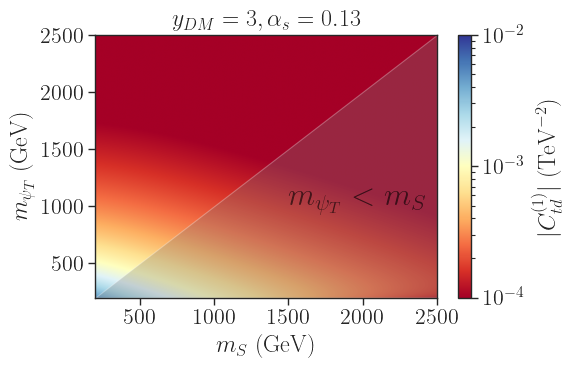

In [24]:
plt.figure(figsize=(6,4))
x = mSDMv
y = mPsiTv
z = (-pts_ud1[:,2])*1e6 # Convert to TeV
znew = np.reshape(z,(len(x),len(y)))
plt.imshow(znew.T, extent=[x.min(),x.max(), y.min(), y.max()], origin='lower',
                  cmap=cm,aspect='auto',norm=LogNorm(vmin=1e-4,vmax=1e-2))
plt.colorbar(label=r'$|C_{td}^{(1)}|$ (TeV$^{-2}$)')
plt.xlabel(r'$m_{S}$ (GeV)')
plt.ylabel(r'$m_{\psi_T}$ (GeV)')
# plt.title(r'$ g g \to \bar{t} t$',fontsize=20)

contours = plt.contour(x, y, znew.T, sorted([1e-2,5e-3]), colors='black',linestyles='dashed')
# plt.axline((500.,500.),slope=1.0,color='gray',linestyle='dashed',linewidth=2.0)
plt.fill_between(x, x, y.min(), facecolor='gray', alpha=0.3)
plt.text(1500.,1000.,r'$m_{\psi_T} < m_{S}$',fontsize=23,c='black',alpha=0.6)
plt.clabel(contours, inline=True, fontsize=18,fmt='%1.0g')
plt.xlim(200,2500)
plt.title(r'$y_{DM} = %1.0f, \alpha_s = %1.2f$' %(yDM,gs**2/(4*np.pi)))
plt.tight_layout()
plt.show()

## $C_{ud}^{(8)}$ with u=t

In [16]:
pts_ud8 = []
for mmsdm,mmpsit in itertools.product(mSDMv,mPsiTv):
    pts_ud8.append([mmsdm,mmpsit,cud8(mmpsit, mmsdm, yDM, gs, g1,t_op=True)])
pts_ud8 = np.array(pts_ud8)
print(pts_ud8)

[[2.00000000e+02 2.00000000e+02 2.34621796e-07]
 [2.00000000e+02 2.02302302e+02 2.31045180e-07]
 [2.00000000e+02 2.04604605e+02 2.27547435e-07]
 ...
 [2.50000000e+03 2.49539540e+03 1.50528794e-09]
 [2.50000000e+03 2.49769770e+03 1.50343215e-09]
 [2.50000000e+03 2.50000000e+03 1.50157949e-09]]


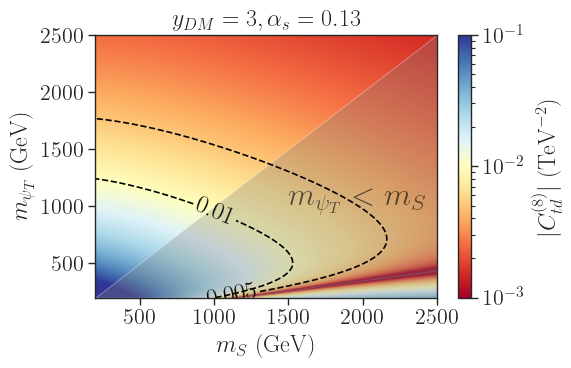

In [20]:
plt.figure(figsize=(6,4))
x = mSDMv
y = mPsiTv
#Positive values 
z_p = (pts_ud8[:,2])*1e6 # Convert to TeV
znewp = np.reshape(z_p,(len(x),len(y)))
plt.imshow(znewp.T, extent=[x.min(),x.max(), y.min(), y.max()], origin='lower',
                  cmap=cm,aspect='auto',norm=LogNorm(vmin=1e-3,vmax=1e-1))
#Negative values
z_m = (-pts_ud8[:,2])*1e6 # Convert to TeV
znewm = np.reshape(z_m,(len(x),len(y)))
plt.imshow(znewm.T, extent=[x.min(),x.max(), y.min(), y.max()], origin='lower',
                  cmap=cm,aspect='auto',norm=LogNorm(vmin=1e-3,vmax=1e-1))
plt.colorbar(label=r'$|C_{td}^{(8)}|$ (TeV$^{-2}$)')
plt.xlabel(r'$m_{S}$ (GeV)')
plt.ylabel(r'$m_{\psi_T}$ (GeV)')
# plt.title(r'$ g g \to \bar{t} t$',fontsize=20)

contours = plt.contour(x, y, znew.T, sorted([1e-2,5e-3]), colors='black',linestyles='dashed')
# plt.axline((500.,500.),slope=1.0,color='gray',linestyle='dashed',linewidth=2.0)
plt.fill_between(x, x, y.min(), facecolor='gray', alpha=0.3)
plt.text(1500.,1000.,r'$m_{\psi_T} < m_{S}$',fontsize=23,c='black',alpha=0.6)
plt.clabel(contours, inline=True, fontsize=18,fmt='%1.0g')
plt.xlim(200,2500)
plt.title(r'$y_{DM} = %1.0f, \alpha_s = %1.2f$' %(yDM,gs**2/(4*np.pi)))
plt.tight_layout()
plt.show()

## $C_{uG}$ with u=t

In [22]:
pts_uG = []
for mmsdm,mmpsit in itertools.product(mSDMv,mPsiTv):
    pts_uG.append([mmsdm,mmpsit,cuG(mmpsit, mmsdm, yDM, gs, g1, ymt, vev)])
pts_uG = np.array(pts_uG)
print(pts_uG)

[[2.00000000e+02 2.00000000e+02 3.74815268e-08]
 [2.00000000e+02 2.02302302e+02 3.69687308e-08]
 [2.00000000e+02 2.04604605e+02 3.64658686e-08]
 ...
 [2.50000000e+03 2.49539540e+03 2.40412774e-10]
 [2.50000000e+03 2.49769770e+03 2.40147070e-10]
 [2.50000000e+03 2.50000000e+03 2.39881772e-10]]


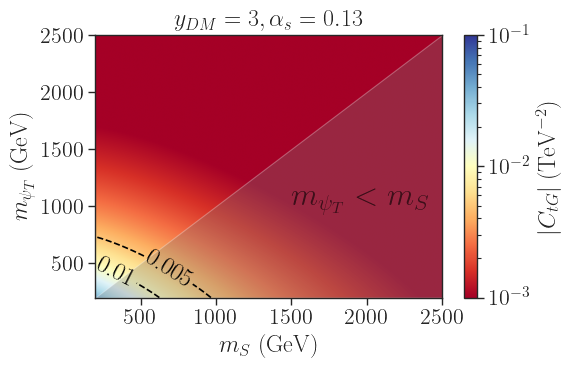

In [29]:
plt.figure(figsize=(6,4))
x = mSDMv
y = mPsiTv
z = (pts_uG[:,2])*1e6 # Convert to TeV
znew = np.reshape(z,(len(x),len(y)))
plt.imshow(znew.T, extent=[x.min(),x.max(), y.min(), y.max()], origin='lower',
                  cmap=cm,aspect='auto',norm=LogNorm(vmin=1e-3,vmax=1e-1))
plt.colorbar(label=r'$|C_{tG}|$ (TeV$^{-2}$)')
plt.xlabel(r'$m_{S}$ (GeV)')
plt.ylabel(r'$m_{\psi_T}$ (GeV)')
# plt.title(r'$ g g \to \bar{t} t$',fontsize=20)

contours = plt.contour(x, y, znew.T, sorted([1e-2,5e-3]), colors='black',linestyles='dashed')
# plt.axline((500.,500.),slope=1.0,color='gray',linestyle='dashed',linewidth=2.0)
plt.fill_between(x, x, y.min(), facecolor='gray', alpha=0.3)
plt.text(1500.,1000.,r'$m_{\psi_T} < m_{S}$',fontsize=23,c='black',alpha=0.6)
plt.clabel(contours, inline=True, fontsize=18,fmt='%1.0g')
plt.xlim(200,2500)
plt.title(r'$y_{DM} = %1.0f, \alpha_s = %1.2f$' %(yDM,gs**2/(4*np.pi)))
plt.tight_layout()
plt.show()

## $C_{uH}$ with u=t

In [31]:
pts_uH = []
for mmsdm,mmpsit in itertools.product(mSDMv,mPsiTv):
    pts_uH.append([mmsdm,mmpsit,cuH(mmpsit, mmsdm, yDM, gs, g1, lamHs, ymt, vev)])
pts_uH = np.array(pts_uH)
print(pts_uH)

[[ 2.00000000e+02  2.00000000e+02 -6.00594935e-08]
 [ 2.00000000e+02  2.02302302e+02 -5.99105098e-08]
 [ 2.00000000e+02  2.04604605e+02 -5.97585795e-08]
 ...
 [ 2.50000000e+03  2.49539540e+03 -3.84532211e-10]
 [ 2.50000000e+03  2.49769770e+03 -3.84456510e-10]
 [ 2.50000000e+03  2.50000000e+03 -3.84380758e-10]]


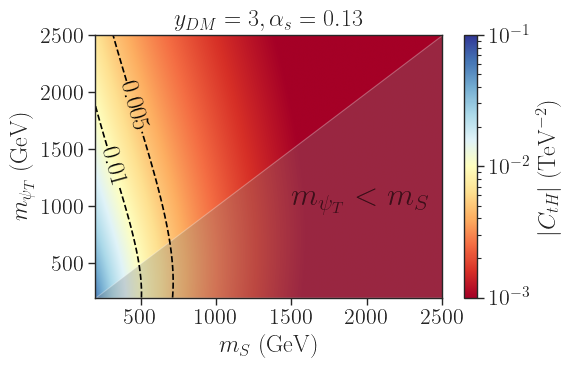

In [32]:
plt.figure(figsize=(6,4))
x = mSDMv
y = mPsiTv
z = (-pts_uH[:,2])*1e6 # Convert to TeV
znew = np.reshape(z,(len(x),len(y)))
plt.imshow(znew.T, extent=[x.min(),x.max(), y.min(), y.max()], origin='lower',
                  cmap=cm,aspect='auto',norm=LogNorm(vmin=1e-3,vmax=1e-1))
plt.colorbar(label=r'$|C_{tH}|$ (TeV$^{-2}$)')
plt.xlabel(r'$m_{S}$ (GeV)')
plt.ylabel(r'$m_{\psi_T}$ (GeV)')
# plt.title(r'$ g g \to \bar{t} t$',fontsize=20)

contours = plt.contour(x, y, znew.T, sorted([1e-2,5e-3]), colors='black',linestyles='dashed')
# plt.axline((500.,500.),slope=1.0,color='gray',linestyle='dashed',linewidth=2.0)
plt.fill_between(x, x, y.min(), facecolor='gray', alpha=0.3)
plt.text(1500.,1000.,r'$m_{\psi_T} < m_{S}$',fontsize=23,c='black',alpha=0.6)
plt.clabel(contours, inline=True, fontsize=18,fmt='%1.0g')
plt.xlim(200,2500)
plt.title(r'$y_{DM} = %1.0f, \alpha_s = %1.2f$' %(yDM,gs**2/(4*np.pi)))
plt.tight_layout()
plt.show()

## $C_{uu}$ with at least one u=t

In [34]:
pts_uu = []
for mmsdm,mmpsit in itertools.product(mSDMv,mPsiTv):
    pts_uu.append([mmsdm,mmpsit,cuu(mmpsit, mmsdm, yDM, gs, g1, ymt, vev, t_op = True)])
pts_uu = np.array(pts_uu)

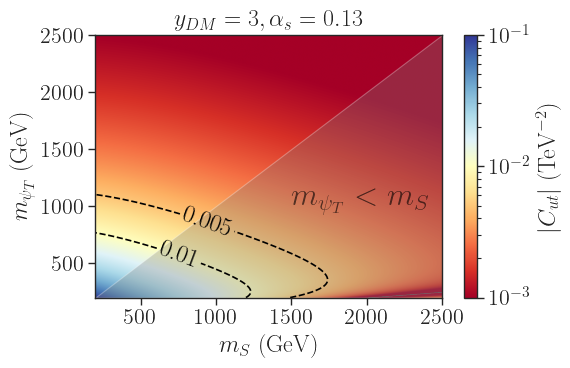

In [37]:
plt.figure(figsize=(6,4))
x = mSDMv
y = mPsiTv
#Positive values 
z_p = (pts_uu[:,2])*1e6 # Convert to TeV
znewp = np.reshape(z_p,(len(x),len(y)))
plt.imshow(znewp.T, extent=[x.min(),x.max(), y.min(), y.max()], origin='lower',
                  cmap=cm,aspect='auto',norm=LogNorm(vmin=1e-3,vmax=1e-1))
#Negative values
z_m = (-pts_uu[:,2])*1e6 # Convert to TeV
znewm = np.reshape(z_m,(len(x),len(y)))
plt.imshow(znewm.T, extent=[x.min(),x.max(), y.min(), y.max()], origin='lower',
                  cmap=cm,aspect='auto',norm=LogNorm(vmin=1e-3,vmax=1e-1))
plt.colorbar(label=r'$|C_{ut}|$ (TeV$^{-2}$)')
plt.xlabel(r'$m_{S}$ (GeV)')
plt.ylabel(r'$m_{\psi_T}$ (GeV)')
# plt.title(r'$ g g \to \bar{t} t$',fontsize=20)

contours = plt.contour(x, y, znew.T, sorted([1e-2,5e-3]), colors='black',linestyles='dashed')
# plt.axline((500.,500.),slope=1.0,color='gray',linestyle='dashed',linewidth=2.0)
plt.fill_between(x, x, y.min(), facecolor='gray', alpha=0.3)
plt.text(1500.,1000.,r'$m_{\psi_T} < m_{S}$',fontsize=23,c='black',alpha=0.6)
plt.clabel(contours, inline=True, fontsize=18,fmt='%1.0g')
plt.xlim(200,2500)
plt.title(r'$y_{DM} = %1.0f, \alpha_s = %1.2f$' %(yDM,gs**2/(4*np.pi)))
plt.tight_layout()
plt.show()